In [1]:
!pip install torch-summary
!pip install torchmetrics

You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install pandas

You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install seaborn

You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import os
from tqdm.notebook import tqdm
import cv2 as op
import torch
from torchsummary import summary
import torchmetrics

#plt.style.use('seaborn')
np.__version__

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

# Loading the data

In [5]:
!pip install --upgrade jupyter
!pip install --upgrade ipywidgets

You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [10]:
PATH = 'retina data\dataset'
label2id = {}
for i, label in enumerate(os.listdir(PATH)):
    label2id[label] = i
    
id2label = {key : value for (value, key) in label2id.items()}

filenames, outcome = [], []

for label in tqdm(os.listdir(PATH)):
    for img in os.listdir(os.path.join(PATH, label)):
        filenames.append(os.path.join(PATH, label, img))
        outcome.append(label2id[label])

        
df = pd.DataFrame({
    "filename" : filenames,
    "outcome" : outcome
})

df = df.sample(frac = 1)
df.head()

  0%|          | 0/4 [00:00<?, ?it/s]

,filename,outcome
440,retina data\dataset\cataract\_126_1745653.jpg,0
4156,retina data\dataset\normal\3412_left.jpg,3
1142,retina data\dataset\diabetic_retinopathy\10160...,1
3108,retina data\dataset\glaucoma\_77_7357873.jpg,2
3906,retina data\dataset\normal\3138_right.jpg,3


C:\Users\Dell\AppData\Local\Temp\ipykernel_13820\3895073008.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.countplot(x = 'outcome', data = df, palette = 'Blues_d')


<Axes: xlabel='outcome', ylabel='count'>

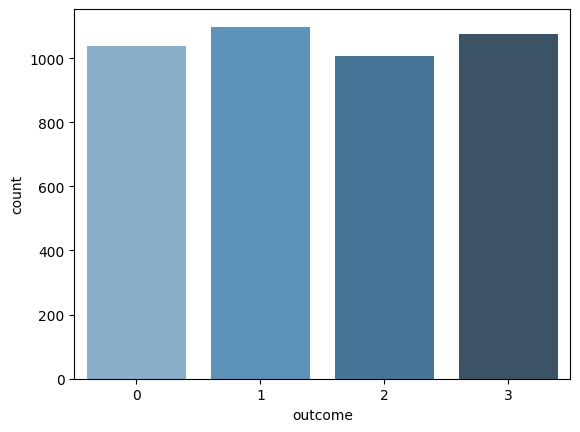

In [12]:
sea.countplot(x = 'outcome', data = df, palette = 'Blues_d')

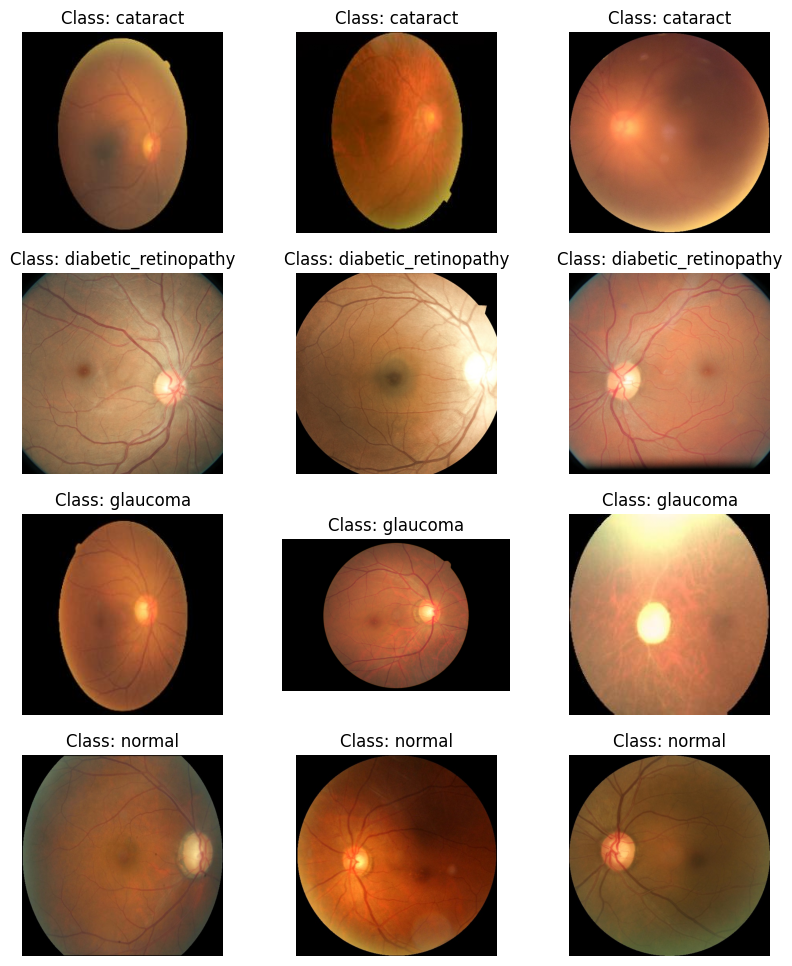

In [13]:
def load_image(path):
    img = plt.imread(path)
    img = (img - img.min())/img.max()
    return img

counter = 0

plt.figure(figsize = (10, 12))

for i in range(4):
    for path in df[df['outcome'] == i].sample(n = 3)['filename']:
        plt.subplot(4, 3, counter + 1)
        img = load_image(path)
        plt.imshow(img)
        plt.axis('off')
        plt.title('Class:' + " " + id2label[i])
        counter += 1
        
plt.show()

In [14]:
!pip install torchvision


You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [15]:
import torch 
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms, models
import torch.nn.functional as f

train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(size = (224, 224)),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.RandomVerticalFlip(p = 0.5)
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(size = (224, 224))
])

class EyeDataset(Dataset):
    def __init__(self, df, n_classes, transform = None):
        self.df = df
        self.n_samples = len(self.df)
        self.n_classes = n_classes
        self.transform = transform
        
    def __len__(self):
        return self.n_samples
    
    def __getitem__(self, index):
        img = plt.imread(self.df.iloc[index, 0])
        label = self.df.iloc[index, 1]
        
        img = (img - img.min())/img.max()
        
        if self.transform:
            img = self.transform(img)
            
        return img.to(torch.float32), label

In [16]:
!pip install sklearn

You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [17]:
from sklearn.model_selection import train_test_split

df_train, df_val = train_test_split(df, test_size = 0.15, random_state = 28)

df_train.shape, df_val.shape


((3584, 2), (633, 2))

In [18]:
NUM_CLASSES = 4
BATCH_SIZE = 128

train_dataset = EyeDataset(df_train, NUM_CLASSES, train_transform)
val_dataset = EyeDataset(df_val, NUM_CLASSES, val_transform)

train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = BATCH_SIZE, shuffle = False)

In [19]:
a, b = next(iter(train_loader))

print(a.shape, b.shape)
del(a)
del(b)

torch.Size([128, 3, 224, 224]) torch.Size([128])


In [20]:
from math import ceil

# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torchvision
# import torchmetrics
# from tqdm import tqdm

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Define your custom CNN architecture
        self.cnn_layers = nn.Sequential(
                nn.Conv2d(3, 32, kernel_size=3, padding=1),
                nn.ReLU(inplace=True),
                nn.Conv2d(32, 32, kernel_size=3, padding=1),
                nn.ReLU(inplace=True),
                nn.MaxPool2d(kernel_size=2, stride=2),
                
                nn.Conv2d(32, 64, kernel_size=3, padding=1),
                nn.ReLU(inplace=True),
                nn.Conv2d(64, 64, kernel_size=3, padding=1),
                nn.ReLU(inplace=True),
                nn.MaxPool2d(kernel_size=2, stride=2),
                
                nn.Conv2d(64, 128, kernel_size=3, padding=1),
                nn.ReLU(inplace=True),
                nn.Conv2d(128, 128, kernel_size=3, padding=1),
                nn.ReLU(inplace=True),
                nn.MaxPool2d(kernel_size=2, stride=2)
            )
            
            
        self.flatten_size = 128 * 28 * 28  
            
            # Define fully connected layers
        self.fc_layers = nn.Sequential(
                nn.Linear(self.flatten_size, 512),
                nn.ReLU(inplace=True),
                nn.Dropout(0.5),  # Increased dropout rate for regularization
                
                nn.Linear(512, 256),
                nn.ReLU(inplace=True),
                nn.Dropout(0.5),
                
                nn.Linear(256, 128),
                nn.ReLU(inplace=True),
                nn.Dropout(0.5),
                
                nn.Linear(128, 64),
                nn.ReLU(inplace=True),
                nn.Dropout(0.5),
                
                nn.Linear(64, 4)
            )

    def forward(self, x):
            x = self.cnn_layers(x)
            x = x.view(x.size(0), -1)  # Flatten the output from CNN layers
            x = self.fc_layers(x)
            return x



            


class Trainer(nn.Module):
    def __init__(self, train_loader, val_loader, device):
        super().__init__()
        self.train_loader = train_loader
        self.val_loader= val_loader
        self.device = device
        
        self.model = Net().to(self.device)
        self.optimizer = torch.optim.AdamW([
            {'params': self.model.cnn_layers.parameters(), 'lr': 3e-5},
            {'params': self.model.fc_layers.parameters(), 'lr': 8e-4}
        ])
        self.loss_fxn = nn.CrossEntropyLoss()
        self.accuracy = torchmetrics.Accuracy(task = "multiclass", num_classes = NUM_CLASSES).to(self.device)
        
        self.history = {'train_loss' : [], 'val_loss': [], 'train_acc': [], 'val_acc': []}
    
    def training_step(self, x, y):
        pred = self.model(x)
        loss = self.loss_fxn(pred, y)
        acc = self.accuracy(pred, y)
        
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
        return loss, acc
    
    def val_step(self, x, y):
        with torch.no_grad():
            pred = self.model(x)
            loss = self.loss_fxn(pred, y)
            acc = self.accuracy(pred, y)
            
        return loss, acc
    
    def step_fxn(self, loader, step):
        loss, acc = 0, 0
        
        for X, y in tqdm(loader):
            X, y = X.to(self.device), y.to(self.device)
            l, a = step(X, y)
            loss, acc = loss + l.item(), acc + a.item()
            
        return loss/len(loader), acc/len(loader)
    
    def train(self, epochs):
        
        for epoch in tqdm(range(epochs)):
            
            train_loss, train_acc = self.step_fxn(self.train_loader, self.training_step)
            val_loss, val_acc = self.step_fxn(self.val_loader, self.val_step)
            
            for item, value in zip(self.history.keys(), list([train_loss, val_loss, train_acc, val_acc])):
                self.history[item].append(value)
            
            
            print("[Epoch: {}] Train: [loss: {:.3f} acc: {:.3f}] Val: [loss: {:.3f} acc:{:.3f}]".format(epoch + 1, train_loss, train_acc, val_loss, val_acc))
    

In [21]:
trainer = Trainer(train_loader, val_loader, device)

## Summary of the model

In [22]:
summary(trainer.model, (3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 128, 28, 28]         --
|    └─Conv2d: 2-1                       [-1, 32, 224, 224]        896
|    └─ReLU: 2-2                         [-1, 32, 224, 224]        --
|    └─Conv2d: 2-3                       [-1, 32, 224, 224]        9,248
|    └─ReLU: 2-4                         [-1, 32, 224, 224]        --
|    └─MaxPool2d: 2-5                    [-1, 32, 112, 112]        --
|    └─Conv2d: 2-6                       [-1, 64, 112, 112]        18,496
|    └─ReLU: 2-7                         [-1, 64, 112, 112]        --
|    └─Conv2d: 2-8                       [-1, 64, 112, 112]        36,928
|    └─ReLU: 2-9                         [-1, 64, 112, 112]        --
|    └─MaxPool2d: 2-10                   [-1, 64, 56, 56]          --
|    └─Conv2d: 2-11                      [-1, 128, 56, 56]         73,856
|    └─ReLU: 2-12                        [-1, 128, 56, 56]         --

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 128, 28, 28]         --
|    └─Conv2d: 2-1                       [-1, 32, 224, 224]        896
|    └─ReLU: 2-2                         [-1, 32, 224, 224]        --
|    └─Conv2d: 2-3                       [-1, 32, 224, 224]        9,248
|    └─ReLU: 2-4                         [-1, 32, 224, 224]        --
|    └─MaxPool2d: 2-5                    [-1, 32, 112, 112]        --
|    └─Conv2d: 2-6                       [-1, 64, 112, 112]        18,496
|    └─ReLU: 2-7                         [-1, 64, 112, 112]        --
|    └─Conv2d: 2-8                       [-1, 64, 112, 112]        36,928
|    └─ReLU: 2-9                         [-1, 64, 112, 112]        --
|    └─MaxPool2d: 2-10                   [-1, 64, 56, 56]          --
|    └─Conv2d: 2-11                      [-1, 128, 56, 56]         73,856
|    └─ReLU: 2-12                        [-1, 128, 56, 56]         --

## Training the model

In [24]:
trainer.train(epochs = 10)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[Epoch: 1] Train: [loss: 1.388 acc: 0.253] Val: [loss: 1.383 acc:0.257]


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[Epoch: 2] Train: [loss: 1.373 acc: 0.281] Val: [loss: 1.368 acc:0.300]


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[Epoch: 3] Train: [loss: 1.360 acc: 0.314] Val: [loss: 1.360 acc:0.350]


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[Epoch: 4] Train: [loss: 1.350 acc: 0.343] Val: [loss: 1.349 acc:0.366]


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[Epoch: 5] Train: [loss: 1.264 acc: 0.436] Val: [loss: 1.243 acc:0.430]


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[Epoch: 6] Train: [loss: 1.098 acc: 0.495] Val: [loss: 0.961 acc:0.548]


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[Epoch: 7] Train: [loss: 0.932 acc: 0.575] Val: [loss: 0.914 acc:0.593]


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[Epoch: 8] Train: [loss: 0.872 acc: 0.598] Val: [loss: 0.835 acc:0.606]


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[Epoch: 9] Train: [loss: 0.814 acc: 0.620] Val: [loss: 0.826 acc:0.598]


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[Epoch: 10] Train: [loss: 0.785 acc: 0.639] Val: [loss: 0.785 acc:0.642]


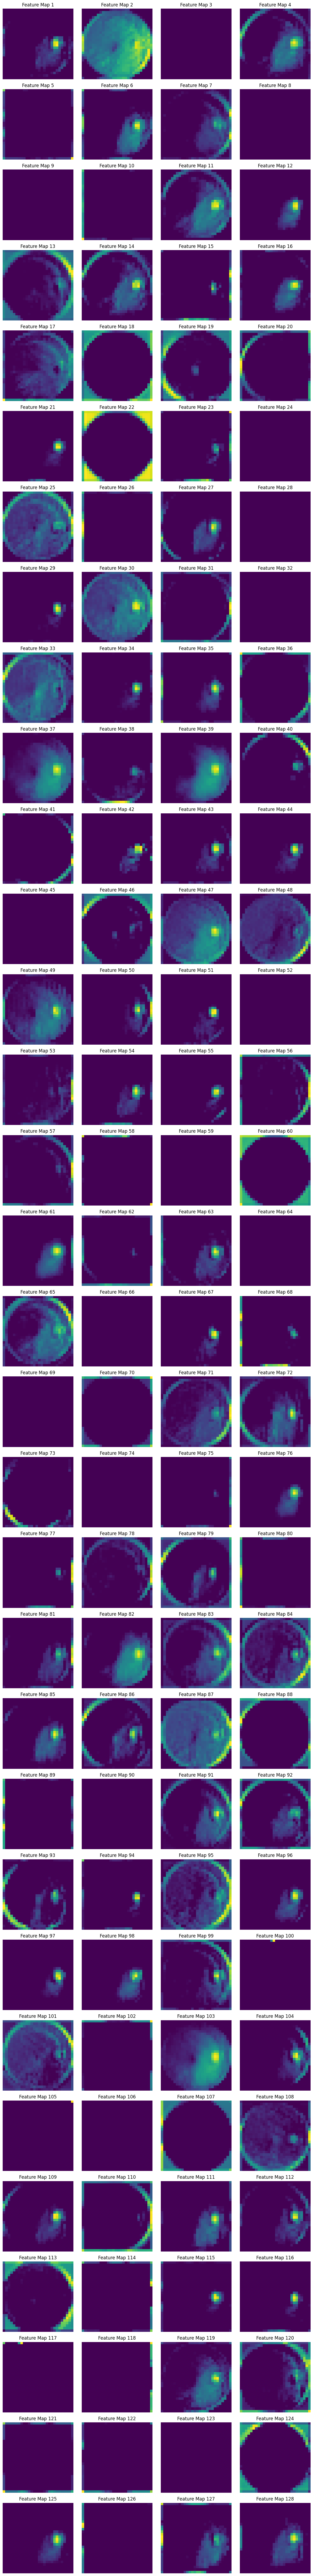

In [31]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_features(model, input_image):
    
    model.eval()
    
    
    with torch.no_grad():
        activations = model.cnn_layers(input_image)
    
    # Plot the feature maps
    num_features = activations.size(1)  # Number of channels in the feature maps
    num_rows = ceil(num_features / 4)    # Number of rows in the subplot grid
    fig, axes = plt.subplots(num_rows, 4, figsize=(12, num_rows * 3))
    
  
    for i in range(num_features):
        row = i // 4
        col = i % 4
        axes[row, col].imshow(activations[0, i].cpu(), cmap='viridis')
        axes[row, col].axis('off')
        axes[row, col].set_title(f'Feature Map {i+1}')
    
    
    plt.tight_layout()
    plt.show()

# Example usage:
from PIL import Image
import torchvision.transforms as transforms


input_image_path = r'E:\New folder (2)\retina data\dataset\normal\8_right.jpg'
input_image = Image.open(input_image_path)


input_transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),           
])


input_image_tensor = input_transform(input_image)


input_image_tensor = input_image_tensor.unsqueeze(0)


visualize_features(trainer.model, input_image_tensor)


# Plotting Model Results

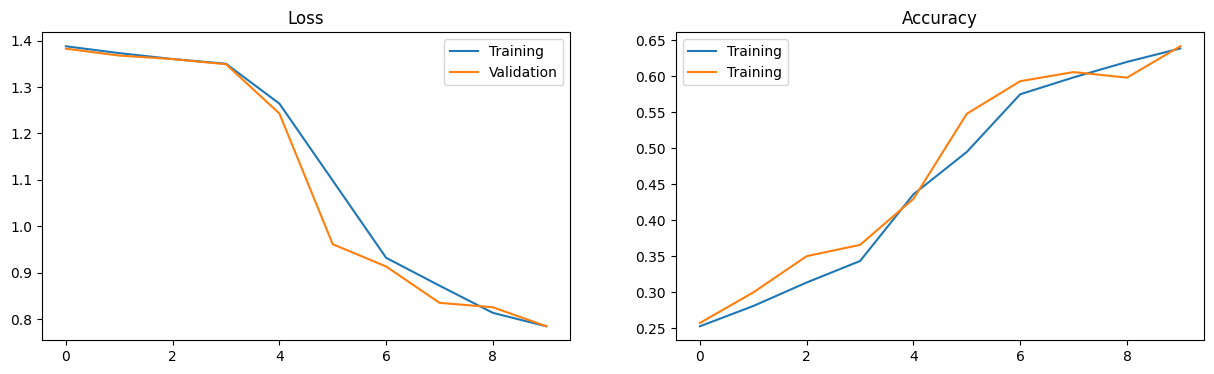

In [26]:
plt.figure(figsize = (15, 4))

plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(trainer.history['train_loss'], label = 'Training')
plt.plot(trainer.history['val_loss'], label = 'Validation')
plt.legend()

plt.subplot(1,2,2)
plt.title('Accuracy')
plt.plot(trainer.history['train_acc'], label = 'Training')
plt.plot(trainer.history['val_acc'], label = 'Training')
plt.legend()



# Model Predictions

In [27]:
preds, true = [], []

with torch.no_grad():
    for x, y in tqdm(val_loader):
        pred = torch.argmax(trainer.model(x.to(device)), axis = 1).detach().cpu().numpy()
        preds.extend(pred)
        true.extend(y)
        
len(preds), len(true)

  0%|          | 0/5 [00:00<?, ?it/s]

(633, 633)

Text(0.5, 1.0, 'Confusion Matrix')

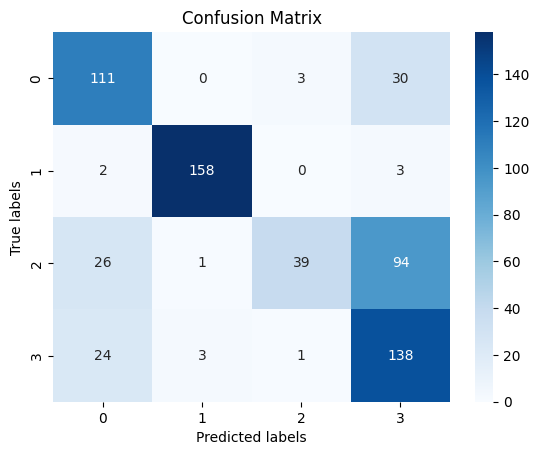

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true, preds)
sea.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

In [29]:
from sklearn.metrics import classification_report

print(classification_report(true, preds, target_names = label2id.keys()))

                      precision    recall  f1-score   support

            cataract       0.68      0.77      0.72       144
diabetic_retinopathy       0.98      0.97      0.97       163
            glaucoma       0.91      0.24      0.38       160
              normal       0.52      0.83      0.64       166

            accuracy                           0.70       633
           macro avg       0.77      0.70      0.68       633
        weighted avg       0.77      0.70      0.68       633



In [33]:
import torchvision.transforms as transforms
from PIL import Image

input_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
])

input_image = Image.open(r'E:\New folder (2)\retina data\dataset\glaucoma\Glaucoma_091.png')


input_tensor = input_transform(input_image)
input_tensor = input_tensor.unsqueeze(0)  

# Make prediction
trainer.model.eval()  # Set the model to evaluation mode
with torch.no_grad():  
    output = trainer.model(input_tensor)

predicted_class = torch.argmax(output, dim=1).item()

print("Predicted class:", predicted_class)


Predicted class: 2


In [ ]:
#torch.save(trainer.model.state_dict(), 'trained_model2.pth')